In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fid = drive.ListFile({'q':"title='profile.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('profile.zip')

f.keys()
!unzip profile.zip
PATH = '/content/profile'


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: Vollprofile/Voll_6_0007.jpg  
  inflating: Vollprofile/Voll_6_0008.jpg  
  inflating: Vollprofile/Voll_6_0009.jpg  
  inflating: Vollprofile/Voll_6_0010.jpg  
  inflating: Vollprofile/Voll_6_0011.jpg  
  inflating: Vollprofile/Voll_6_0012.jpg  
  inflating: Vollprofile/Voll_6_0013.jpg  
  inflating: Vollprofile/Voll_6_0014.jpg  
  inflating: Vollprofile/Voll_6_0015.jpg  
  inflating: Vollprofile/Voll_6_0016.jpg  
  inflating: Vollprofile/Voll_6_0017.jpg  
  inflating: Vollprofile/Voll_6_0018.jpg  
  inflating: Vollprofile/Voll_6_0019.jpg  
  inflating: Vollprofile/Voll_6_0020.jpg  
  inflating: Vollprofile/Voll_6_0021.jpg  
  inflating: Vollprofile/Voll_6_0022.jpg  
  inflating: Vollprofile/Voll_6_0023.jpg  
  inflating: Vollprofile/Voll_6_0024.jpg  
  inflating: Vollprofile/Voll_6_0025.jpg  
  inflating: Vollprofile/Voll_6_0026.jpg  
  inflating: Vollprofile/Voll_6_0027.jpg  
  inflating: Vollprofile/Voll_

Hohl_O2_0768.jpg


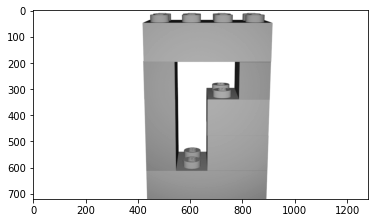

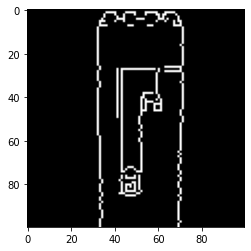

Datensatz 29029
1
2
1
2
0
1
2
1
2
0
Trainingdata:  17417
Validationdata:  5807
Testdata:  5805


In [ ]:
#Neural Network Propra2020
#Author Lennart Brinkmann, Franziska Budde
#v0.1


import tensorflow as tf
from tensorflow import keras
import numpy as np #array operation
import matplotlib.pyplot as plt #display stuff
import os
import cv2 #image operations
import random
import pickle #saving progress


DATADIR = "/content" #"D:\Testimages"
CATEGORIES = ["Hohlprofile", "Offene Profile", "Vollprofile"]
LABELS = ["Voll_1_","Voll_2_","Voll_3_","Voll_4_","Voll_5_","Voll_6_", "Hohl_O1","Hohl_O2","Hohl_O3","Hohl_O4",
        "Offen_1","Offen_2","Offen_3","Offen_4","Offen_5","Offen_6","Offen_7","Offen_8","Offen_9","Offen_10","Offen_11",
        "Offen_12","Offen_13","Offen_14","Offen_15","Offen_16","Offen_17","Offen_18","Offen_19", "Offen_20"]


for category in CATEGORIES:  # do profiles
    path = os.path.join(DATADIR,category)  # create path to testimg
    for img in os.listdir(path):  # iterate over each image per profile
        print(img)
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
        
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break   #to show only first img
    break


IMG_SIZE = 100 #size of the img

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #shape
edges = cv2.Canny(new_array,100,200) #edge detection
plt.imshow(edges, cmap='gray')
plt.show()


training_data = []
def create_training_data():
    for category in CATEGORIES:  # do profiles
        path = os.path.join(DATADIR, category)  # create path to testimg
        class_num = CATEGORIES.index(category) #gives the profile a number
        for img in os.listdir(path):  # iterate over each image per profile
            try:                        # basically try catch corrupt img
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data
                edges = cv2.Canny(new_array,100,200) #edge detection
                training_data.append([edges, class_num]) #adding to training_data
            except Exception as e:
                pass

create_training_data()
print("Datensatz",len(training_data))

#shuffle data
random.shuffle(training_data)
for sample in training_data[:10]: #shows lables for first ten elements
   print(sample[1])

size = len(training_data)
val_size = int(0.2*size) #20% validation daten
test_size = int(0.2*size) #20% test daten
train_size = int(0.6*size) #60% trainings daten

# Daten in Trainings-, Test-, Validierungsdaten aufteilen
train = training_data[:train_size]
validation_data = training_data[train_size:-val_size]
test_data = training_data[-val_size:]

print("Trainingdata: ", len(train))
print("Validationdata: ", len(validation_data))
print("Testdata: ", len(test_data))


#model trainingsdaten
X_train = []  #feature
y_train = []  #label

for features,label in train:    #for passing list to NN
    X_train.append(features)
    y_train.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #transforming X into np array -1 catches all numbers, img size, 1 grayscale, 3 would be rgb
y_train = np.array(y_train)

#model validierungsdaten
X_val = []  #feature
y_val = []  #label

for features,label in validation_data:    #for passing list to NN
    X_val.append(features)
    y_val.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #transforming X into np array -1 catches all numbers, img size, 1 grayscale, 3 would be rgb
y_val = np.array(y_val)



In [ ]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1), padding='same')) 
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.Conv2D(1024, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1024, activation='relu')) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       2

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/10
1089/1089 [==============================] - 13s 12ms/step - loss: 0.3018 - accuracy: 0.9750 - val_loss: 0.0219 - val_accuracy: 0.9981
Epoch 2/10
1089/1089 [==============================] - 13s 12ms/step - loss: 0.0339 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1089/1089 [==============================] - 13s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1089/1089 [==============================] - 13s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1089/1089 [==============================] - 13s 12ms/step - loss: 6.8444e-12 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1089/1089 [==============================] - 13s 12ms/step - loss: 1.3689e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1089/1089 [==============================] - 13s 12ms/step - loss: 0.0000e+00

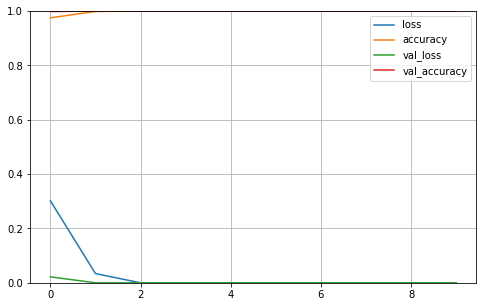

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
X_test = []  #feature
y_test = []  #label

for features,label in test_data:    
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #transforming X into np array -1 catches all numbers, img size, 1 grayscale, 3 would be rgb
y_test = np.array(y_test)


In [ ]:
#mit testbildern aus gleichem datensatz testen
loss, acc = model.evaluate(X_test, y_test, verbose=2)

182/182 - 1s - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
#selbst aufgenommene testbilder laden
fid = drive.ListFile({'q':"title='testbilder.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('testbilder.zip')

f.keys()
!unzip testbilder.zip
PATH = '/content/testbilder'

Archive:  testbilder.zip
   creating: vollprofile/
  inflating: vollprofile/2020-07-12-184451.jpg  
  inflating: vollprofile/2020-07-12-184459.jpg  
  inflating: vollprofile/2020-07-12-184502.jpg  
  inflating: vollprofile/2020-07-12-184505.jpg  
  inflating: vollprofile/2020-07-12-193157.jpg  
  inflating: vollprofile/2020-07-12-193205.jpg  
  inflating: vollprofile/2020-07-12-193211.jpg  
  inflating: vollprofile/2020-07-12-193222.jpg  
  inflating: vollprofile/2020-07-12-193226.jpg  
  inflating: vollprofile/2020-07-12-193231.jpg  
  inflating: vollprofile/2020-07-12-193235.jpg  
  inflating: vollprofile/2020-07-12-193245.jpg  
  inflating: vollprofile/2020-07-12-193249.jpg  
  inflating: vollprofile/2020-07-12-193253.jpg  
  inflating: vollprofile/2020-07-12-193303.jpg  
  inflating: vollprofile/2020-07-12-193307.jpg  
  inflating: vollprofile/2020-07-12-193311.jpg  
  inflating: vollprofile/2020-07-12-193326.jpg  
  inflating: vollprofile/2020-07-12-193330.jpg  
  inflating: vollp

In [ ]:
#testbilder laden
IMG_SIZE = 100
test_data2 = []
DATADIR2 = "/content"
TEST_CATEGORIES = ["hohlprofile","offene-profile","vollprofile" ]
for category in TEST_CATEGORIES:  # do profiles
    path = os.path.join(DATADIR2, category)  # create path to testimg
    class_num = TEST_CATEGORIES.index(category) #gives the profile a number
    for img in os.listdir(path):  # iterate over each image per profile
        try:                        # basically try catch corrupt img
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data
            edges = cv2.Canny(new_array,IMG_SIZE,IMG_SIZE) #edge detection
            test_data2.append([edges, class_num]) #adding to test_data2
        except Exception as e:
            pass

In [ ]:
#testdaten anpassen
random.shuffle(test_data2)
X_test2 = []  #feature
y_test2 = []  #label


for features,label in test_data2:    #for passing list to NN
    X_test2.append(features)
    y_test2.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test2 = np.array(X_test2).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #transforming X into np array -1 catches all numbers, img size, 1 grayscale, 3 would be rgb
y_test2 = np.array(y_test2)

print(len(X_test2))

649


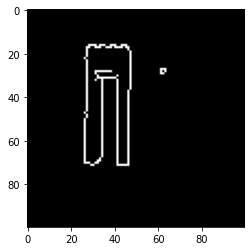

Offene Profile
-----------------------------------------------------------------


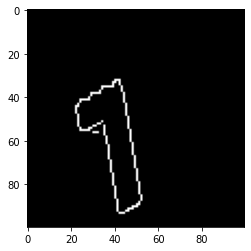

Offene Profile
-----------------------------------------------------------------


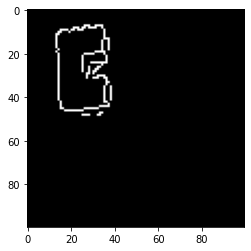

Offene Profile
-----------------------------------------------------------------


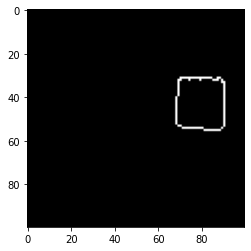

Vollprofile
-----------------------------------------------------------------


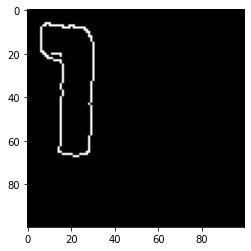

Offene Profile
-----------------------------------------------------------------


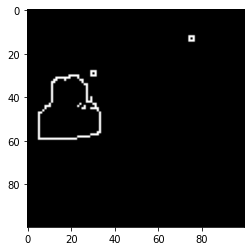

Vollprofile
-----------------------------------------------------------------


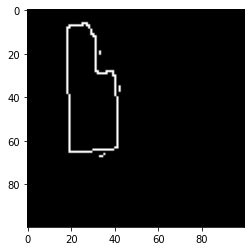

Offene Profile
-----------------------------------------------------------------


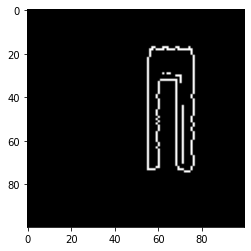

Hohlprofile
-----------------------------------------------------------------


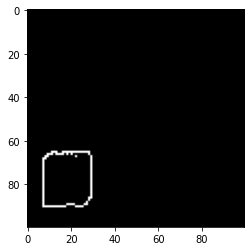

Offene Profile
-----------------------------------------------------------------


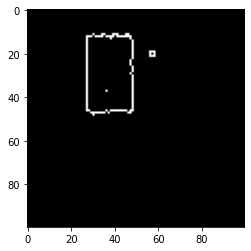

Offene Profile
-----------------------------------------------------------------


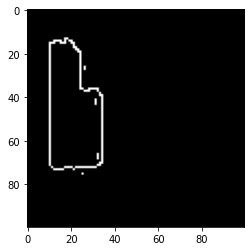

Offene Profile
-----------------------------------------------------------------


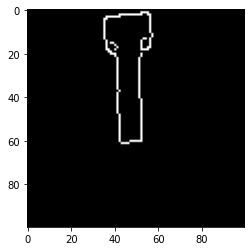

Offene Profile
-----------------------------------------------------------------


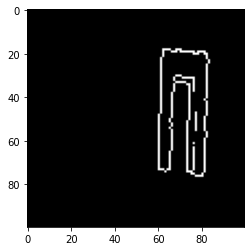

Offene Profile
-----------------------------------------------------------------


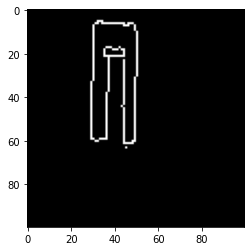

Offene Profile
-----------------------------------------------------------------


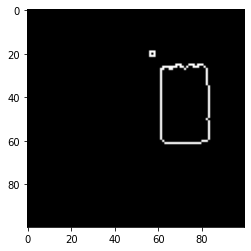

Vollprofile
-----------------------------------------------------------------


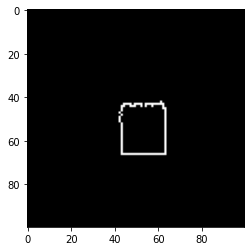

Offene Profile
-----------------------------------------------------------------


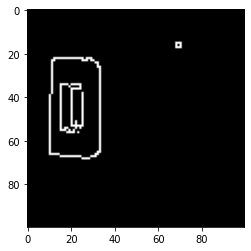

Offene Profile
-----------------------------------------------------------------


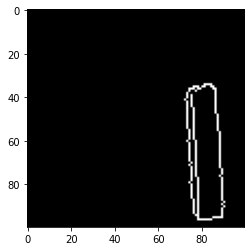

Offene Profile
-----------------------------------------------------------------


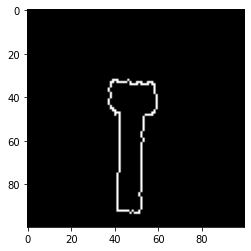

Offene Profile
-----------------------------------------------------------------


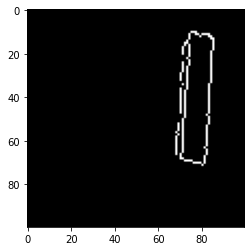

Offene Profile
-----------------------------------------------------------------


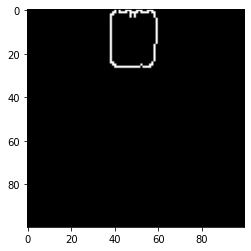

Vollprofile
-----------------------------------------------------------------


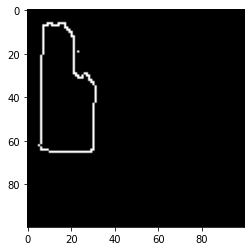

Offene Profile
-----------------------------------------------------------------


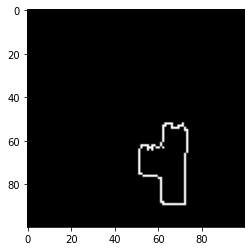

Offene Profile
-----------------------------------------------------------------


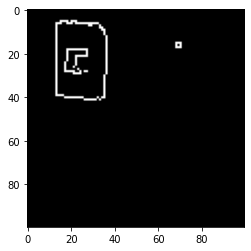

Vollprofile
-----------------------------------------------------------------


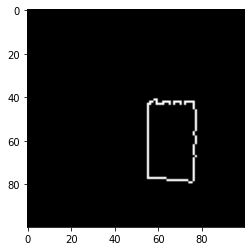

Offene Profile
-----------------------------------------------------------------


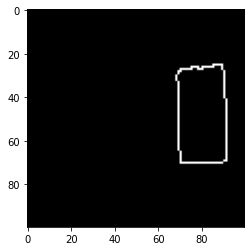

Offene Profile
-----------------------------------------------------------------


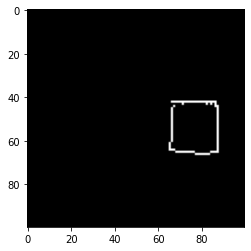

Offene Profile
-----------------------------------------------------------------


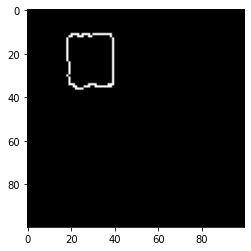

Offene Profile
-----------------------------------------------------------------


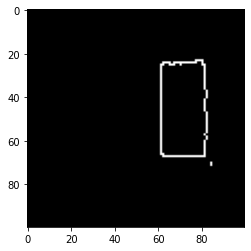

Offene Profile
-----------------------------------------------------------------


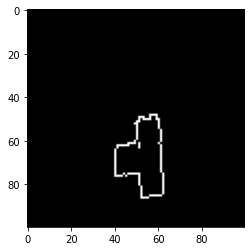

Offene Profile
-----------------------------------------------------------------


In [ ]:
#30 bilder der selbstaufgenommenen profile testen
i = -1
for img in X_test2[:30]:
  i+=1
  new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #shape
  plt.imshow(new_array, cmap='gray')
  plt.show()
  x=np.argmax(model.predict(np.array(X_test2[i:i+1])), axis=1) #X_test2[i:i+1]
  print(CATEGORIES[x[0]])
  print("-----------------------------------------------------------------")

In [ ]:
loss, acc = model.evaluate(X_test2, y_test2, verbose=2)

21/21 - 0s - loss: 47.5758 - accuracy: 0.5085


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np #array operation
import matplotlib.pyplot as plt #display stuff
import os
import cv2 #image operations
import random
import pickle #saving progress

In [ ]:
#model speichern
model.save('my_model51acc.h5')


In [ ]:
path = F"/content/gdrive/My Drive/{model.save}" 
model.save(path,'my_model51acc.h5')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/<bound method Network.save of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f144db6a2e8>>/assets


In [ ]:
#model laden
new_model = tf.keras.models.load_model('my_model51acc.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       2

In [ ]:
X_test = []  #feature
y_test = []  #label

for features,label in test_data:    
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #transforming X into np array -1 catches all numbers, img size, 1 grayscale, 3 would be rgb
y_test = np.array(y_test)


In [ ]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)

94/94 - 2s - loss: 0.0000e+00 - accuracy: 1.0000
